In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

## 貯蔵期間の違い

<Figure size 640x480 with 0 Axes>

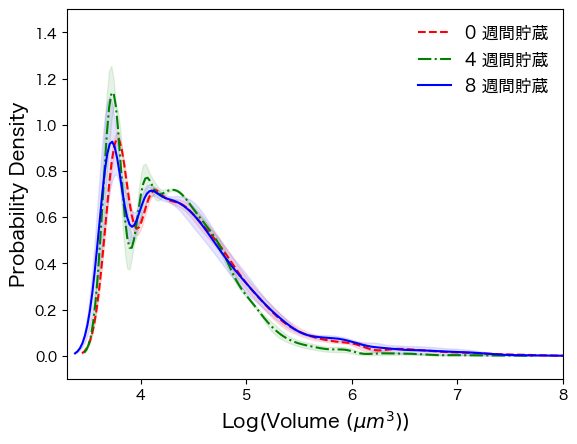

<Figure size 640x480 with 0 Axes>

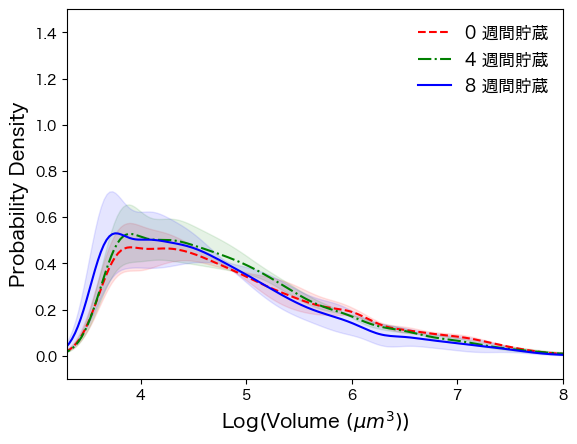

<Figure size 640x480 with 0 Axes>

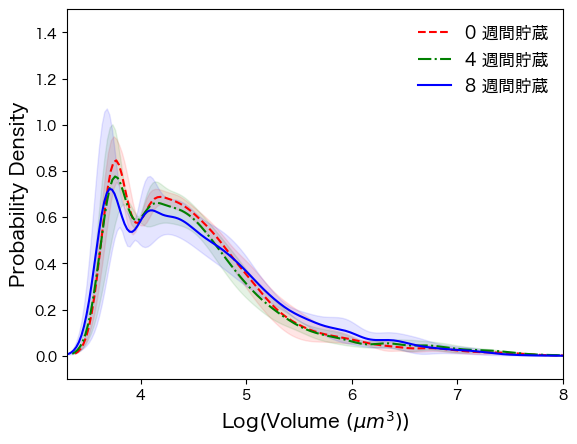

In [2]:
# パラメータ

BINS = 50
LABEL = 'Vol. (mm?)'

for i, CULT in enumerate(['Fuji','Kougyoku','Ourin']):

    all_storage_void_df = pd.DataFrame()

    for i_storage in ['00','04','08']:
        each_storage_void_df = pd.DataFrame()

        for j_sample in range(1,4):
            i_path = f'./../data/CT_porosity_distribution/{CULT}/{CULT}_{i_storage}_{j_sample}.csv'

            # 各サンプルの結合
            df_temp = pd.read_csv(i_path,index_col=0,encoding='Shift-JIS')
            kde_x = sns.kdeplot(np.log10(df_temp[LABEL]*(10**9)+0.0001)).get_lines()[0].get_data()[0]
            kde_y = sns.kdeplot(np.log10(df_temp[LABEL]*(10**9)+0.0001)).get_lines()[0].get_data()[1]
            # hist_temp = plt.hist(np.log10(df_temp['Vol. (pixels?)']*(10**9)+0.0001),bins=BINS)[0] # 各区間ごとの頻度を算出
            plt.clf()
            each_storage_void_df = pd.concat([each_storage_void_df, pd.DataFrame(kde_y)],axis=1)

        # columnsにする
        each_storage_void_df.columns = [f'{i_storage}_{j}' for j in range(1,4)]
        each_storage_void_df.index = kde_x

        # 全サンプル用に結合
        all_storage_void_df = pd.concat([all_storage_void_df, each_storage_void_df],axis=1)

        # 平均および標準偏差サンプルを作成
        # week{storage}_mean,std_dfに格納
        if i_storage == '00':
            week0_mean_df = each_storage_void_df.mean(axis=1)
            week0_std_df = each_storage_void_df.std(axis=1)
        elif i_storage == '04':
            week2_mean_df = each_storage_void_df.mean(axis=1)
            week2_std_df = each_storage_void_df.std(axis=1)
        else:
            week4_mean_df = each_storage_void_df.mean(axis=1)
            week4_std_df = each_storage_void_df.std(axis=1)


    ALPHA=0.1

    fig,ax = plt.subplots()
    ax.plot(week0_mean_df.index,week0_mean_df.values,label='0 週間貯蔵',color='r',linestyle='dashed')
    ax.fill_between(week0_std_df.index,week0_mean_df-week0_std_df,week0_mean_df+week0_std_df,color='r',alpha=ALPHA)

    # ax1 = ax.twinx()
    ax.plot(week2_mean_df.index,week2_mean_df.values,label='4 週間貯蔵',color='g',linestyle='-.')
    ax.fill_between(week2_std_df.index,week2_mean_df-week2_std_df,week2_mean_df+week2_std_df,color='g',alpha=ALPHA)

    # ax2 = ax.twinx()
    ax.plot(week4_mean_df.index,week4_mean_df.values,label='8 週間貯蔵',color='b')
    ax.fill_between(week4_std_df.index,week4_mean_df-week4_std_df,week4_mean_df+week4_std_df,color='b',alpha=ALPHA)

    ax.legend()
    ax.set_xlabel('Log(Volume $(μm^3)$)',fontsize=14)
    ax.set_ylabel('Probability Density',fontsize=14)
    ax.legend(loc='upper right',edgecolor='w',fontsize=12).get_frame().set_linewidth(1)
    plt.xlim(3.3,8)
    plt.ylim(-0.1,1.5)
    plt.show()

    # fig.savefig('./../../something/void_porosity_mean.png',dpi=400)
    fig.savefig(f'./../output/図{32+i}_compare_dist_{CULT}.png',dpi=400)

## 品種差の違い

<Figure size 640x480 with 0 Axes>

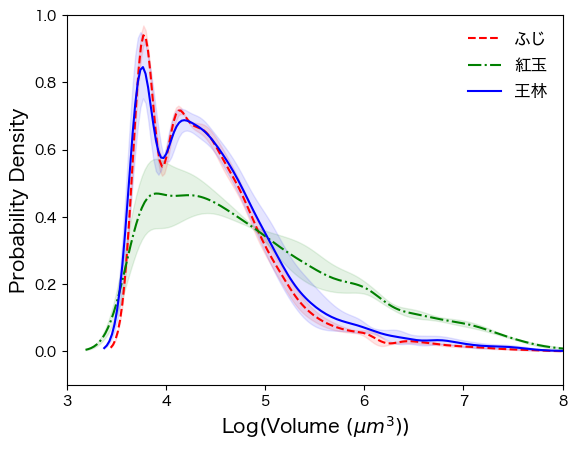

In [3]:
# パラメータ

BINS = 50
LABEL = 'Vol. (mm?)'

all_storage_void_df = pd.DataFrame()

for i_cult in ['Fuji','Kougyoku','Ourin']:
    each_storage_void_df = pd.DataFrame()
    
    for j_sample in range(1,4):
        i_path = f'./../data/CT_porosity_distribution/{i_cult}/{i_cult}_00_{j_sample}.csv'
        
        # 各サンプルの結合
        df_temp = pd.read_csv(i_path,index_col=0,encoding='Shift-JIS')
        kde_x = sns.kdeplot(np.log10(df_temp[LABEL]*(10**9)+0.0001)).get_lines()[0].get_data()[0]
        kde_y = sns.kdeplot(np.log10(df_temp[LABEL]*(10**9)+0.0001)).get_lines()[0].get_data()[1]
        # hist_temp = plt.hist(np.log10(df_temp['Vol. (pixels?)']*(10**9)+0.0001),bins=BINS)[0] # 各区間ごとの頻度を算出
        plt.clf()
        each_storage_void_df = pd.concat([each_storage_void_df, pd.DataFrame(kde_y)],axis=1)
        
    # columnsにする
    each_storage_void_df.columns = [f'{i_cult}_{j}' for j in range(1,4)]
    each_storage_void_df.index = kde_x
    
    # 全サンプル用に結合
    all_storage_void_df = pd.concat([all_storage_void_df, each_storage_void_df],axis=1)
    
    # 平均および標準偏差サンプルを作成
    # week{storage}_mean,std_dfに格納
    if i_cult == 'Fuji':
        week0_mean_df = each_storage_void_df.mean(axis=1)
        week0_std_df = each_storage_void_df.std(axis=1)
    elif i_cult == 'Kougyoku':
        week2_mean_df = each_storage_void_df.mean(axis=1)
        week2_std_df = each_storage_void_df.std(axis=1)
    else:
        week4_mean_df = each_storage_void_df.mean(axis=1)
        week4_std_df = each_storage_void_df.std(axis=1)

        
ALPHA=0.1

fig,ax = plt.subplots()
ax.plot(week0_mean_df.index,week0_mean_df.values,label='ふじ',color='r',linestyle='dashed')
ax.fill_between(week0_std_df.index,week0_mean_df-week0_std_df,week0_mean_df+week0_std_df,color='r',alpha=ALPHA)

# ax1 = ax.twinx()
ax.plot(week2_mean_df.index,week2_mean_df.values,label='紅玉',color='g',linestyle='-.')
ax.fill_between(week2_std_df.index,week2_mean_df-week2_std_df,week2_mean_df+week2_std_df,color='g',alpha=ALPHA)

# ax2 = ax.twinx()
ax.plot(week4_mean_df.index,week4_mean_df.values,label='王林',color='b')
ax.fill_between(week4_std_df.index,week4_mean_df-week4_std_df,week4_mean_df+week4_std_df,color='b',alpha=ALPHA)

ax.legend()
ax.set_xlabel('Log(Volume $(μm^3)$)',fontsize=14)
ax.set_ylabel('Probability Density',fontsize=14)
ax.legend(loc='upper right',edgecolor='w',fontsize=12).get_frame().set_linewidth(1)
plt.xlim(3,8)
plt.ylim(-0.1,1)
plt.show()

# fig.savefig('./../../something/void_porosity_mean.png',dpi=400)
fig.savefig(f'./../output/図35_compare_dist_品種差.png',dpi=400)